## Exercise - Train and evaluate a regression model

### Regression

Supervised machine learning techniques involve training a model to operate on a set of features and predict a label using a dataset that includes some already-known label values. [Denetimli makine öğrenimi teknikleri, bir modelin bir dizi özellik üzerinde çalışması ve önceden bilinen bazı etiket değerlerini içeren bir veri kümesini kullanarak bir etiketi tahmin etmesi için eğitilmesini içerir.] The training process fits the features to the known labels to define a general function that can be applied to new features for which the labels are unknown, and predict them. [Eğitim süreci, etiketleri bilinmeyen yeni özelliklere uygulanabilecek genel bir işlevi tanımlamak ve bunları tahmin etmek için özellikleri bilinen etiketlere uydurur.] You can think of this function like this, in which y represents the label we want to predict and x represents the features the model uses to predict it. [Bu işlevi şöyle düşünebilirsiniz; burada y, tahmin etmek istediğimiz etiketi temsil eder ve x, modelin onu tahmin etmek için kullandığı özellikleri temsil eder.]

y = f (X) 

In most cases, x is actually a vector that consists of multiple feature values, so to be a little more precise, the function could be expressed like this: [Çoğu durumda, x aslında birden çok özellik değerinden oluşan bir vektördür, bu nedenle biraz daha kesin olmak gerekirse, işlev şu şekilde ifade edilebilir:]

y = f (x1, x2, x3,... )
 

The goal of training the model is to find a function that performs some kind of calculation to the x values that produces the result y. [Modeli eğitmenin amacı, y sonucunu üreten x değerlerine bir tür hesaplama yapan bir fonksiyon bulmaktır.] We do this by applying a machine learning algorithm that tries to fit the x values to a calculation that produces y reasonably accurately for all of the cases in the training dataset. [Bunu, eğitim veri kümesindeki tüm durumlar için makul bir doğrulukta y üreten bir hesaplamaya x değerlerini uydurmaya çalışan bir makine öğrenimi algoritması uygulayarak yapıyoruz.]

There are lots of machine learning algorithms for supervised learning, and they can be broadly divided into two types: [Denetimli öğrenme için çok sayıda makine öğrenimi algoritması vardır ve bunlar genel olarak iki türe ayrılabilir:]

- Regression algorithms: Algorithms that predict a y value that is a numeric value, such as the price of a house or the number of sales transactions. [Regresyon algoritmaları: Bir evin fiyatı veya satış işlemlerinin sayısı gibi sayısal bir değer olan bir y değerini tahmin eden algoritmalar.]

- Classification algorithms: Algorithms that predict to which category, or class, an observation belongs. [Sınıflandırma algoritmaları: Bir gözlemin hangi kategoriye veya sınıfa ait olduğunu tahmin eden algoritmalar.] The y value in a classification model is a vector of probability values between 0 and 1, one for each class, indicating the probability of the observation belonging to each class. [Bir sınıflandırma modelindeki y değeri, her sınıf için bir tane olmak üzere 0 ile 1 arasındaki olasılık değerlerinin bir vektörüdür ve her sınıfa ait gözlemin olasılığını gösterir.]

In this notebook, we'll focus on regression, using an example based on a real study in which data for a bicycle sharing scheme was collected and used to predict the number of rentals based on seasonality and weather conditions. [Bu not defterinde, bir bisiklet paylaşım planı için verilerin toplandığı ve mevsimsellik ve hava koşullarına bağlı olarak kiralama sayısını tahmin etmek için kullanıldığı gerçek bir araştırmaya dayanan bir örnek kullanarak regresyona odaklanacağız.] We'll use a simplified version of the dataset from that study. [Bu çalışmadan elde edilen veri kümesinin basitleştirilmiş bir sürümünü kullanacağız.]

Citation: The data used in this exercise is derived from Capital Bikeshare and is used in accordance with the published license agreement. [Alıntı: Bu uygulamada kullanılan veriler Capital Bikeshare'den türetilmiştir ve yayınlanmış lisans sözleşmesine uygun olarak kullanılmaktadır.]

### Explore the Data

The first step in any machine learning project is to explore the data that you will use to train a model. [Herhangi bir makine öğrenimi projesinde ilk adım, bir modeli eğitmek için kullanacağınız verileri keşfetmektir.] The goal of this exploration is to try to understand the relationships between its attributes; in particular, any apparent correlation between the features and the label your model will try to predict. [Bu keşfin amacı, nitelikleri arasındaki ilişkileri anlamaya çalışmaktır; özellikle, özellikler ile modelinizin tahmin etmeye çalışacağı etiket arasındaki herhangi bir belirgin ilişki.] This may require some work to detect and fix issues in the data (such as **dealing with missing values**, **errors**, or **outlier values**), deriving **new feature columns** by transforming or combining existing features (a process known as feature engineering), **normalizing numeric features** (values you can measure or count) so they're on a similar scale, and **encoding categorical features** (values that represent discrete categories) as numeric indicators. [Bu, verilerdeki sorunları tespit etmek ve düzeltmek (eksik değerler, hatalar veya aykırı değerlerle uğraşmak gibi), mevcut özellikleri dönüştürerek veya birleştirerek yeni özellik sütunları türetmek (özellik mühendisliği olarak bilinen bir süreç), sayısal özellikleri normalleştirmek için biraz çalışma gerektirebilir. (ölçebileceğiniz veya sayabileceğiniz değerler) benzer bir ölçekte olmaları ve kategorik özellikleri (ayrı kategorileri temsil eden değerler) sayısal göstergeler olarak kodlama.]

Let's start by loading the bicycle sharing data as a Pandas DataFrame and viewing the first few rows. [Bisiklet paylaşım verilerini Pandas DataFrame olarak yükleyerek ve ilk birkaç satırı görüntüleyerek başlayalım.]

In [1]:
import pandas as pd

# load the training dataset
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


The data consists of the following columns:

- **instant**: A unique row identifier

- **dteday**: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.

- **season**: A numerically encoded value indicating the season (1:spring, 2:summer, 3:fall, 4:winter)

- **yr**: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)

- **mnth**: The calendar month in which the observation was made (1:January ... 12:December)

- **holiday**: A binary value indicating whether or not the observation was made on a public holiday)

- **weekday**: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)

- **workingday**: A binary value indicating whether or not the day is a working day (not a weekend or holiday)

- **weathersit**: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)

- **temp**: The temperature in celsius (normalized)

- **atemp**: The apparent ("feels-like") temperature in celsius (normalized)

- **hum**: The humidity level (normalized)

- **windspeed**: The windspeed (normalized)

- **rentals**: The number of bicycle rentals recorded.

In this dataset, rentals represents the label (the y value) our model must be trained to predict. [Bu veri kümesinde kiralamalar, modelimizin tahmin etmek için eğitilmesi gereken etiketi (y değeri) temsil eder.] The other columns are potential features (x values). [Diğer sütunlar potansiyel özelliklerdir (x değerleri).]

As mentioned previously, you can perform some feature engineering to combine or derive new features. [Daha önce belirtildiği gibi, yeni özellikleri birleştirmek veya türetmek için bazı özellik mühendisliği gerçekleştirebilirsiniz.] For example, let's add a new column named day to the dataframe by extracting the day component from the existing dteday column. [Örneğin, mevcut dteday sütunundan day bileşenini çıkararak dataframe'e day adında yeni bir sütun ekleyelim.] The new column represents the day of the month from 1 to 31. [Yeni sütun, 1'den 31'e kadar ayın gününü temsil eder.]

In [2]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,9
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,10


OK, let's start our analysis of the data by examining a few key descriptive statistics. [Tamam, birkaç temel tanımlayıcı istatistiği inceleyerek veri analizimize başlayalım.] We can use the dataframe's describe method to generate these for the numeric features as well as the rentals label column. [Kiralama etiketi sütununun yanı sıra sayısal özellikler için bunları oluşturmak için veri çerçevesinin açıklama yöntemini kullanabiliriz.]

In [3]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


The statistics reveal some information about the distribution of the data in each of the numeric fields, including the number of observations (there are 731 records), the mean, standard deviation, minimum and maximum values, and the quartile values (the threshold values for 25%, 50% - which is also the median, and 75% of the data). [İstatistikler, gözlem sayısı (731 kayıt vardır), ortalama, standart sapma, minimum ve maksimum değerler ve çeyrek değerler (eşik değerler) dahil olmak üzere sayısal alanların her birinde verilerin dağılımı hakkında bazı bilgileri ortaya çıkarır. %25, %50 - bu da medyandır ve verilerin %75'i).] From this, we can see that the mean number of daily rentals is around 848; but there's a comparatively large standard deviation, indicating a lot of variance in the number of rentals per day. [Buradan günlük ortalama kiralama sayısının 848 civarında olduğunu görebiliriz; ama nispeten büyük bir standart sapma var, bu da günlük kiralama sayısında çok fazla varyans olduğunu gösteriyor.]

We might get a clearer idea of the distribution of rentals values by visualizing the data. [Verileri görselleştirerek kiralama değerlerinin dağılımı hakkında daha net bir fikir edinebiliriz.] Common plot types for visualizing numeric data distributions are histograms and box plots, so let's use Python's matplotlib library to create one of each of these for the rentals column. [Sayısal veri dağılımlarını görselleştirmek için yaygın çizim türleri histogramlar ve kutu çizimleridir, bu yüzden kiralama sütunu için bunlardan her birini oluşturmak için Python'un matplotlib kitaplığını kullanalım.]

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_9792\1182655606.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


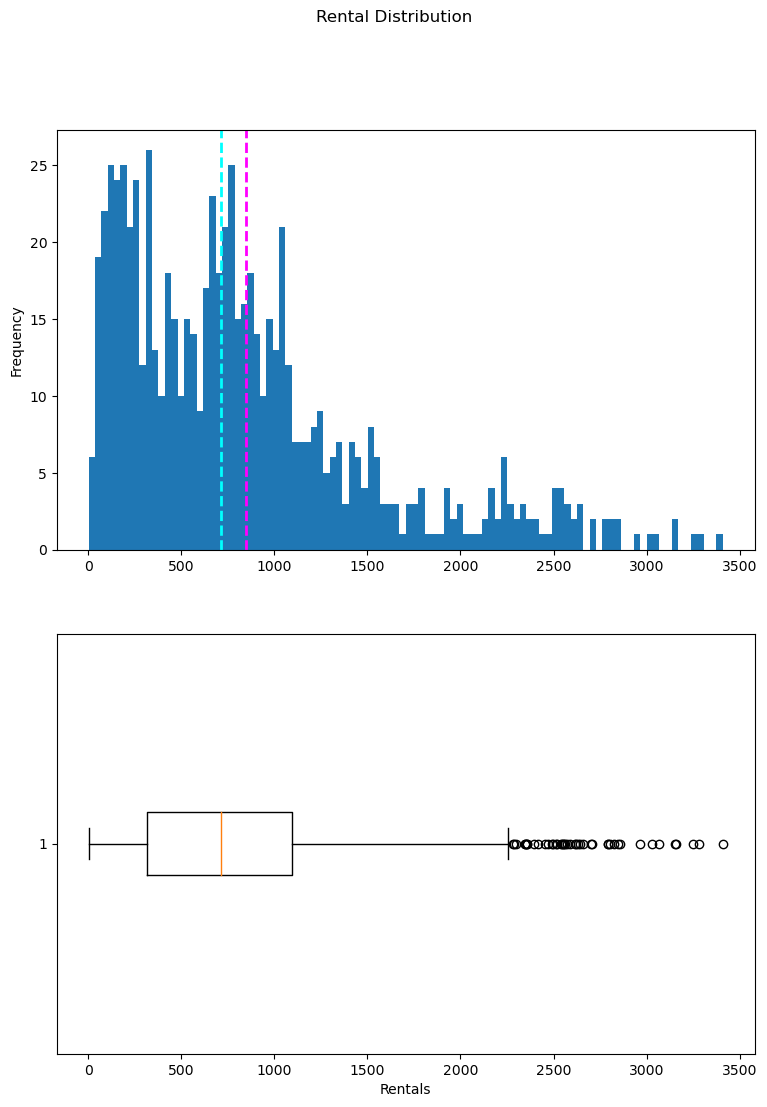

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = bike_data['rentals']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()

The plots show that the number of daily rentals ranges from 0 to just over 3,400. [Grafikler, günlük kiralama sayısının 0'dan 3.400'ün biraz üzerine çıktığını gösteriyor.] However, the mean (and median) number of daily rentals is closer to the low end of that range, with most of the data between 0 and around 2,200 rentals. [Bununla birlikte, ortalama (ve medyan) günlük kiralama sayısı, bu aralığın alt sınırına yakındır ve verilerin çoğu 0 ile yaklaşık 2.200 kiralama arasındadır.] The few values above this are shown in the box plot as small circles, indicating that they are outliers - in other words, unusually high or low values beyond the typical range of most of the data. [Bunun üzerindeki birkaç değer, kutu grafiğinde küçük daireler olarak gösterilir, bu da onların aykırı değer olduğunu gösterir - başka bir deyişle, çoğu verinin tipik aralığının ötesinde alışılmadık derecede yüksek veya düşük değerler.]

We can do the same kind of visual exploration of the numeric features. [Sayısal özelliklerin aynı tür görsel araştırmasını yapabiliriz.] Let's create a histogram for each of these. [Bunların her biri için bir histogram oluşturalım.]

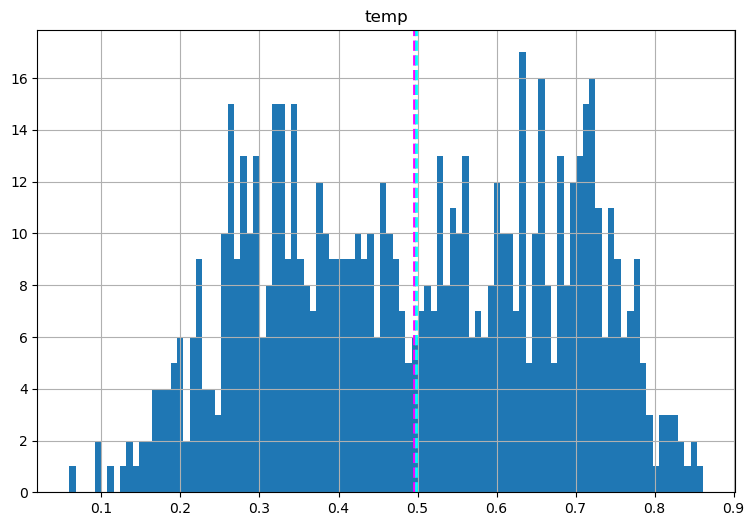

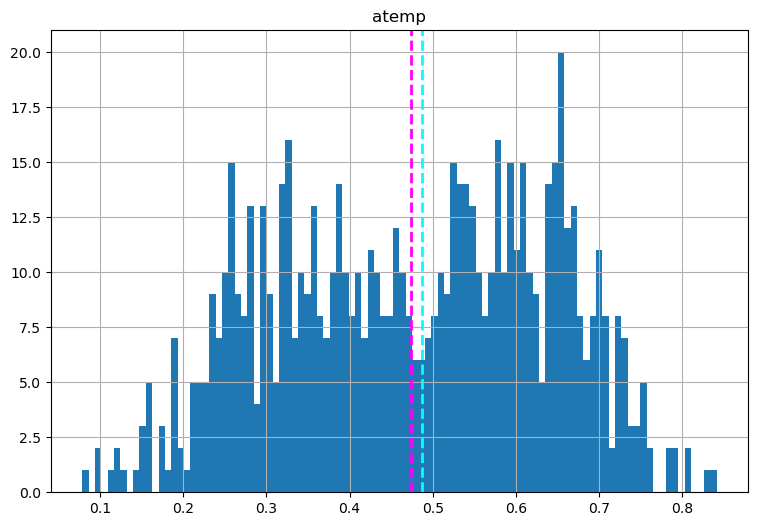

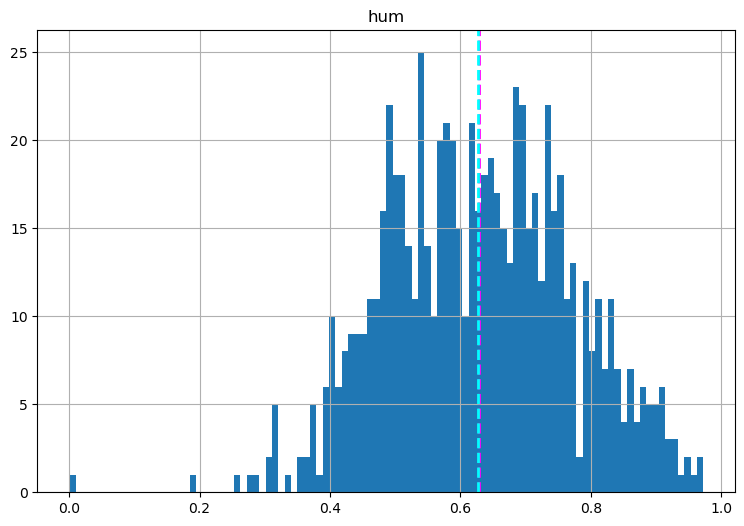

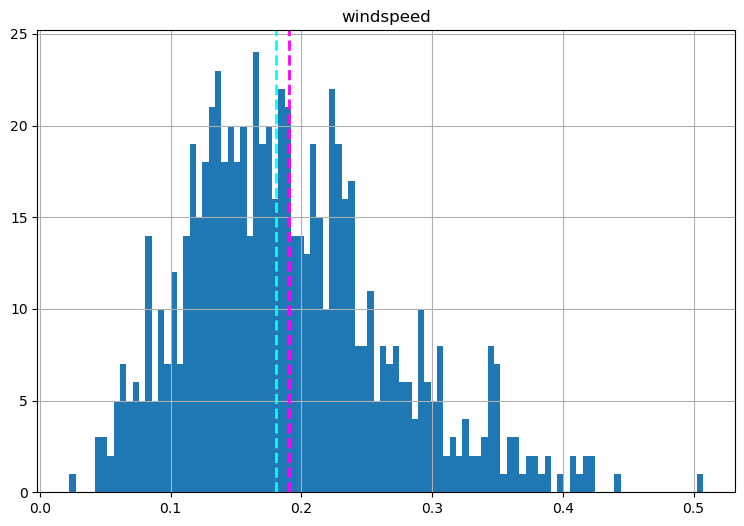

In [5]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
#     ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100)
    plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.title(col)
plt.show()

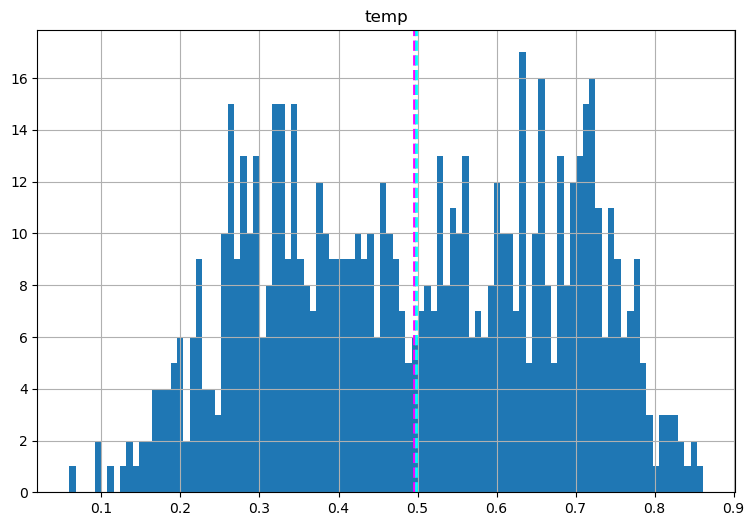

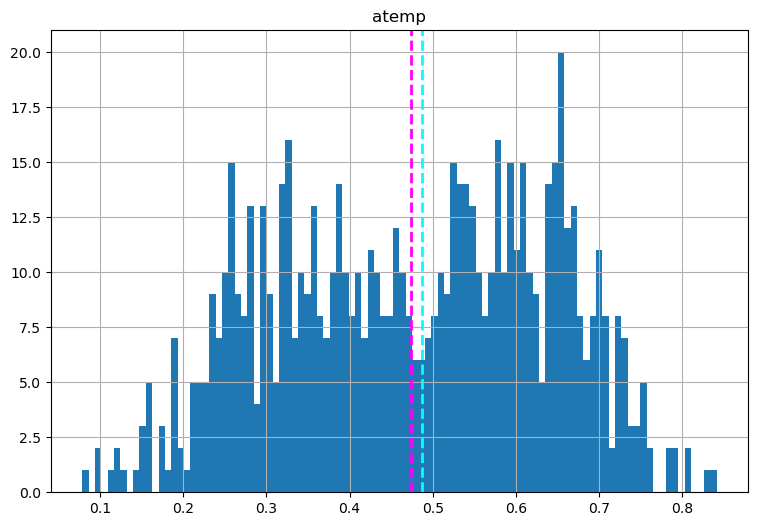

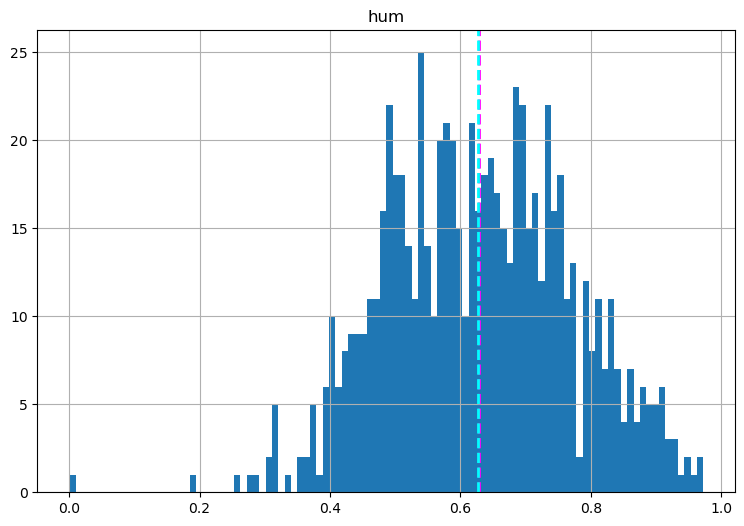

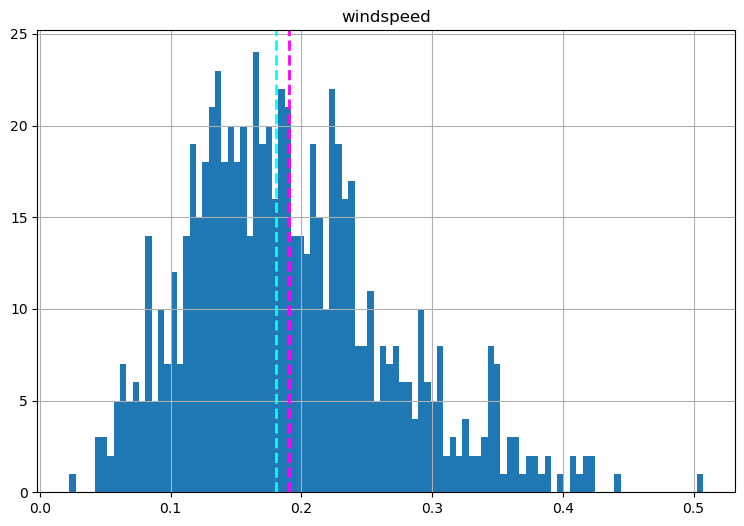

In [6]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

The numeric features seem to be more normally distributed, with the mean and median nearer the middle of the range of values, coinciding with where the most commonly occurring values are. [Sayısal özellikler daha normal dağılmış gibi görünmektedir, ortalama ve medyan değer aralığının ortasına daha yakındır ve en yaygın olarak meydana gelen değerlerin olduğu yere denk gelir.]

**Note**: The distributions are not truly normal in the statistical sense, which would result in a smooth, symmetric "bell-curve" histogram with the mean and mode (the most common value) in the center; but they do generally indicate that most of the observations have a value somewhere near the middle. [Not: Dağılımlar istatistiksel anlamda gerçekten normal değildir; bu, merkezde ortalama ve mod (en yaygın değer) ile düzgün, simetrik bir 'çan eğrisi' histogramıyla sonuçlanacaktır; ancak genellikle gözlemlerin çoğunun ortalara yakın bir yerde bir değere sahip olduğunu gösterirler.]

We've explored the distribution of the numeric values in the dataset, but what about the categorical features? [Veri kümesindeki sayısal değerlerin dağılımını araştırdık, peki ya kategorik özellikler?] These aren't continuous numbers on a scale, so we can't use histograms; but we can plot a bar chart showing the count of each discrete value for each category. [Bunlar bir ölçekte sürekli sayılar değildir, bu nedenle histogramları kullanamayız; ancak her kategori için her bir ayrık değerin sayısını gösteren bir çubuk grafik çizebiliriz.]

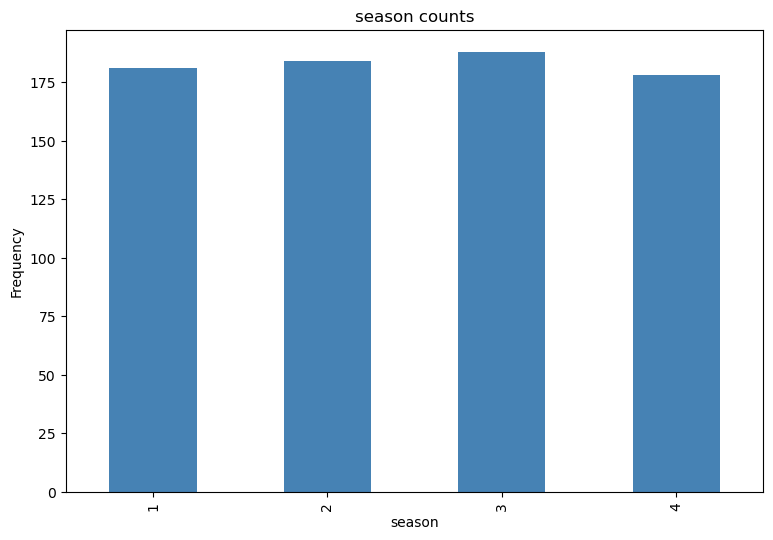

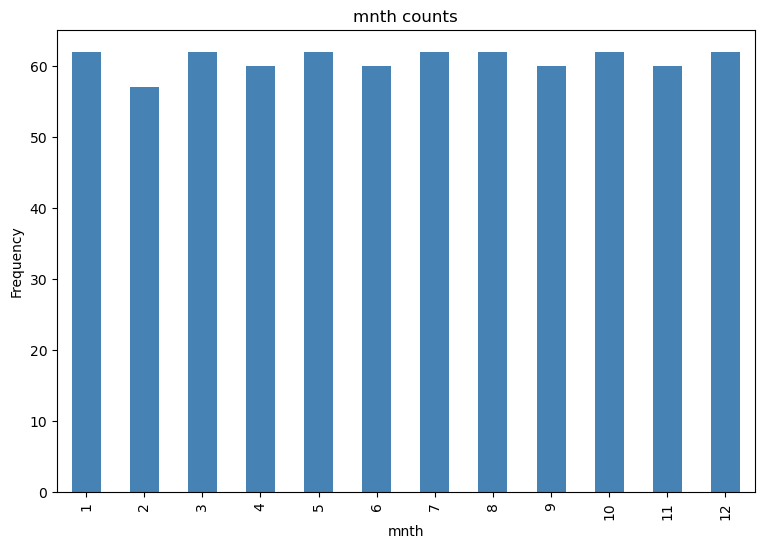

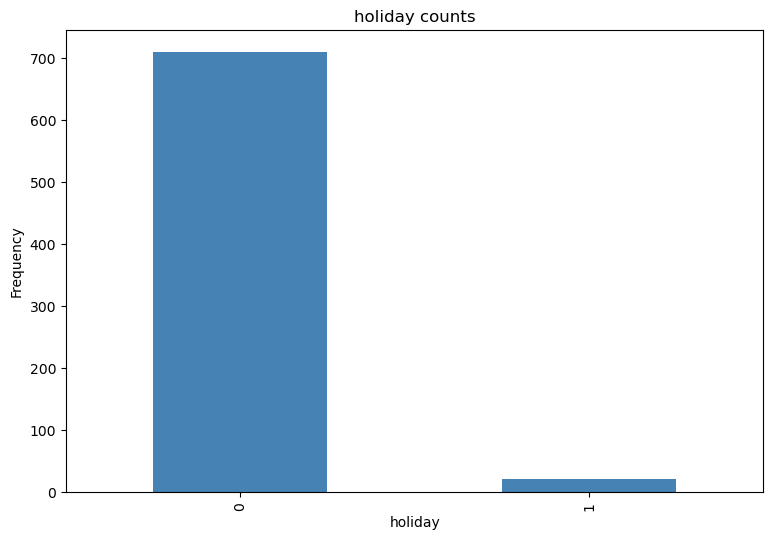

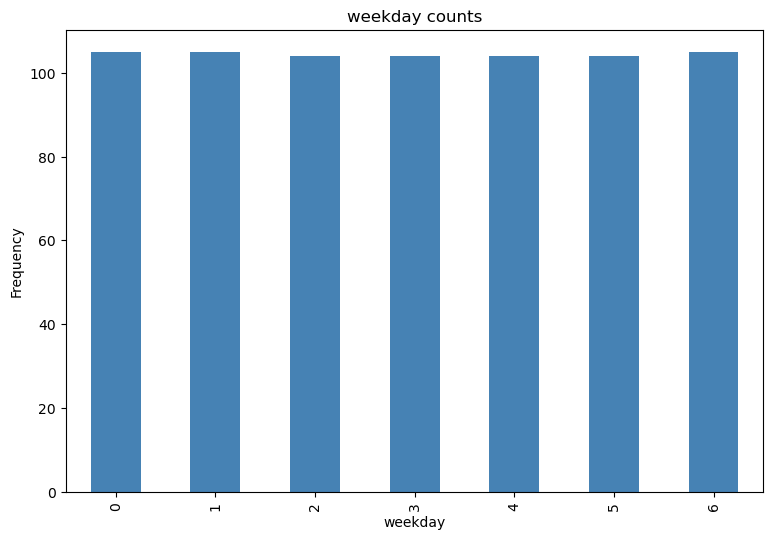

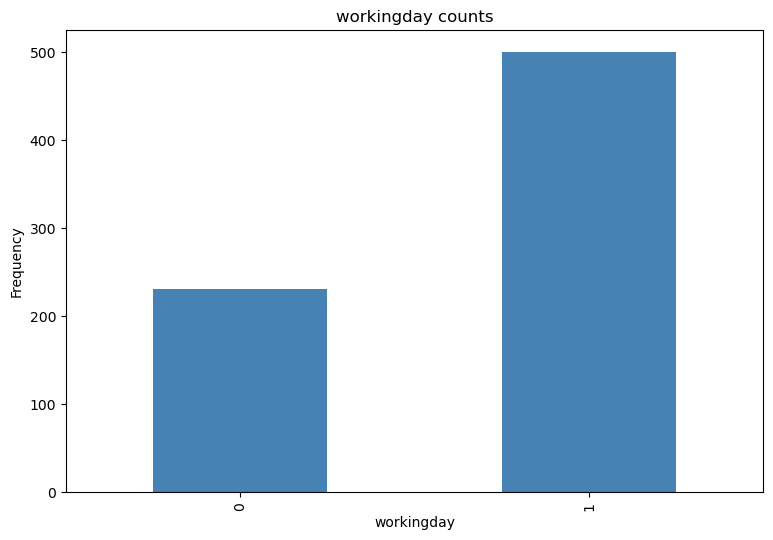

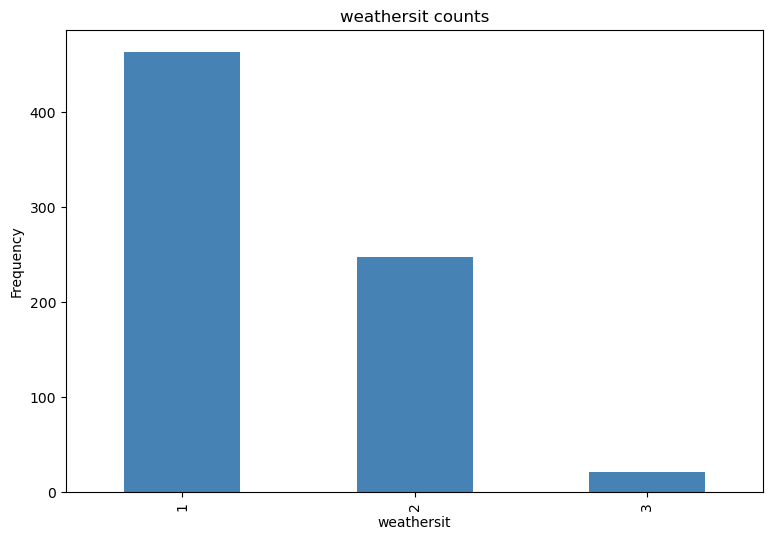

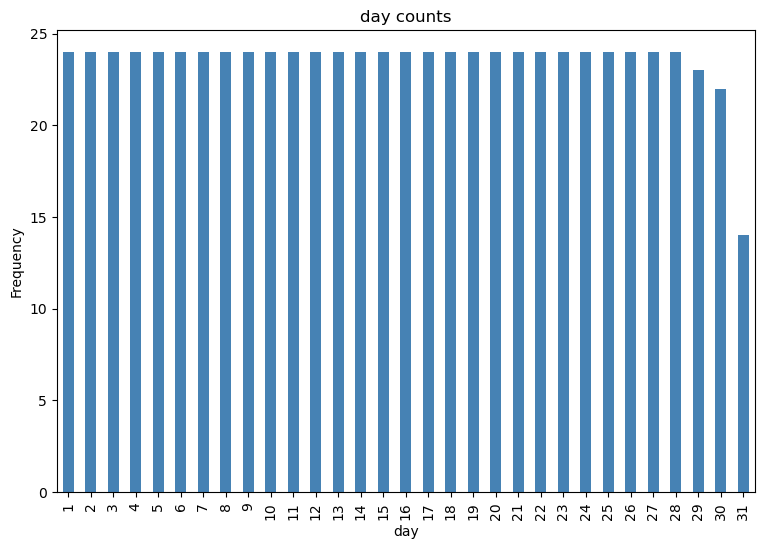

In [7]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Many of the categorical features show a more or less uniform distribution (meaning there's roughly the same number of rows for each category). [Kategorik özelliklerin çoğu, aşağı yukarı tek tip bir dağılım gösterir (yani, her kategori için kabaca aynı sayıda satır vardır).] Exceptions to this include: [Bunun istisnaları şunları içerir:]
                                                                           
- **holiday**: There are many fewer days that are holidays than days that aren't. [tatil: Tatil olmayan günlerden çok daha az gün vardır.]

- **workingday**: There are more working days than non-working days. [iş günü: Çalışmayan günlerden daha fazla iş günü vardır.]

- **weathersit**: Most days are category 1 (clear), with category 2 (mist and cloud) the next most common. [hava durumu: Çoğu gün kategori 1'dir (açık), ardından kategori 2 (sis ve bulut) en yaygın olanıdır.] There are comparatively few category 3 (light rain or snow) days, and no category 4 (heavy rain, hail, or fog) days at all. [Nispeten az sayıda kategori 3 (hafif yağmur veya kar) günü vardır ve kategori 4 (şiddetli yağmur, dolu veya sis) günleri hiç yoktur.]

Now that we know something about the distribution of the data in our columns, we can start to look for relationships between the features and the rentals label we want to be able to predict. [Artık sütunlarımızdaki verilerin dağılımı hakkında bir şeyler bildiğimize göre, tahmin edebilmek istediğimiz özellikler ve kiralama etiketi arasındaki ilişkileri aramaya başlayabiliriz.]

For the numeric features, we can create scatter plots that show the intersection of feature and label values. [Sayısal özellikler için, özellik ve etiket değerlerinin kesişimini gösteren dağılım grafikleri oluşturabiliriz.] We can also calculate the correlation statistic to quantify the apparent relationship.. [Görünen ilişkiyi ölçmek için korelasyon istatistiğini de hesaplayabiliriz.]

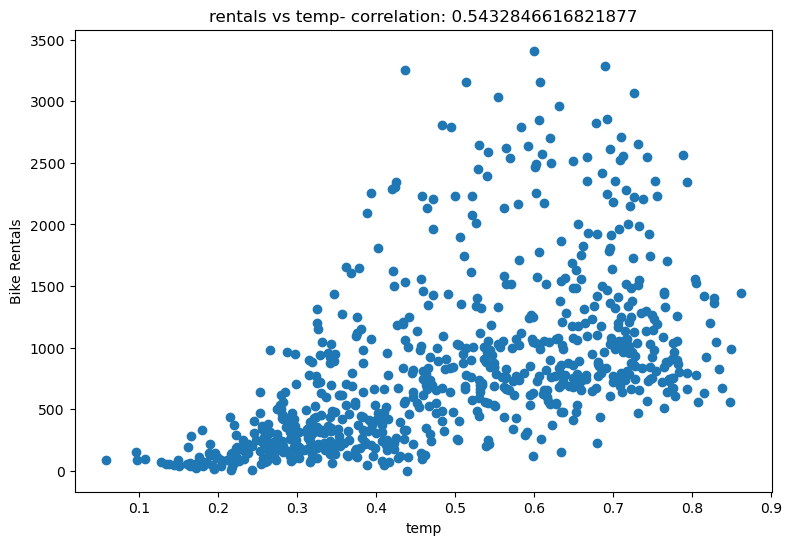

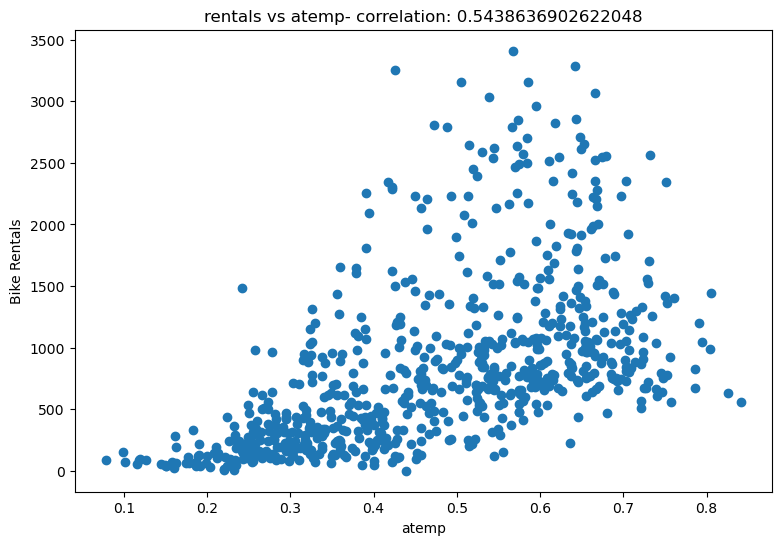

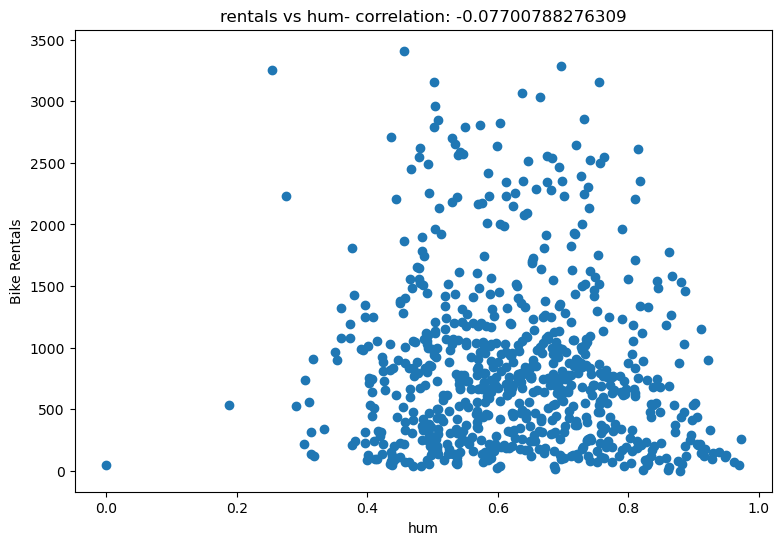

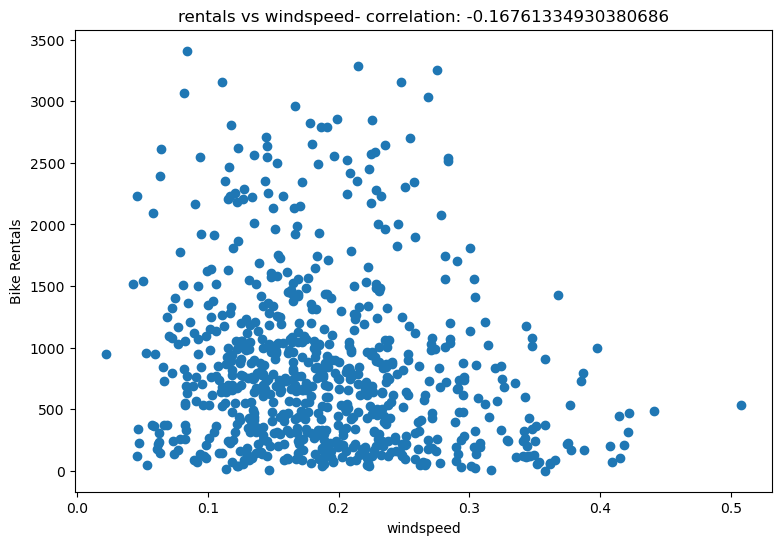

In [8]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

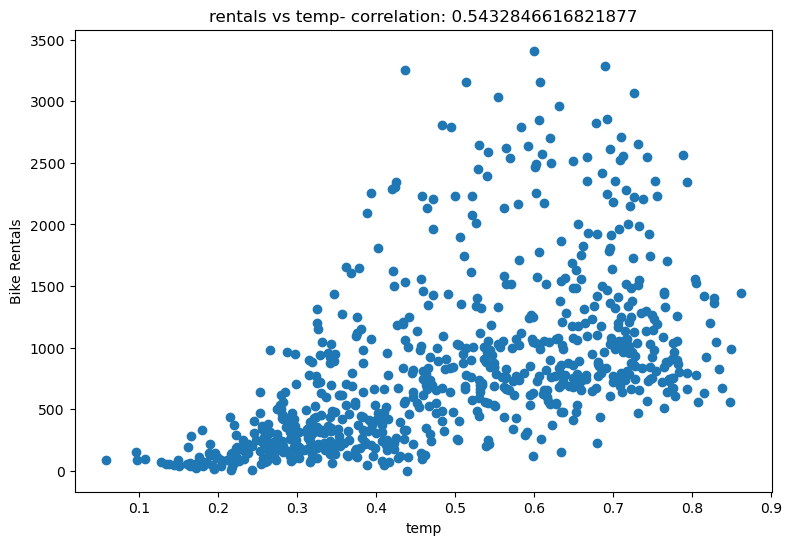

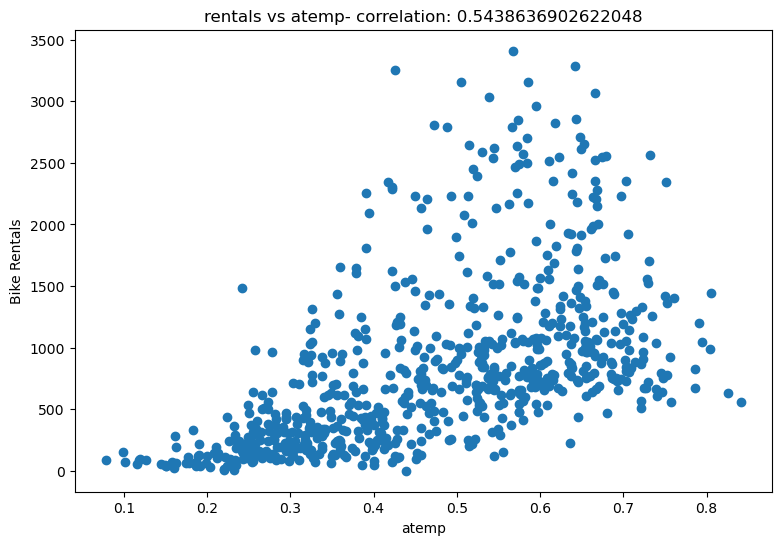

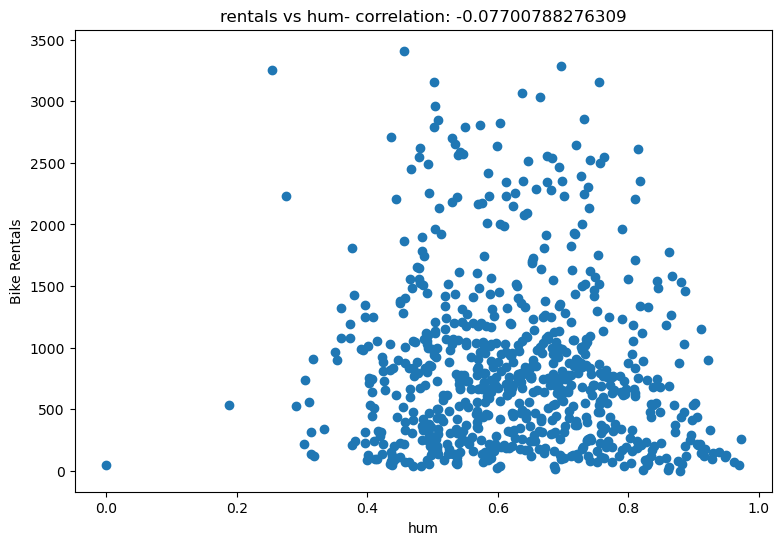

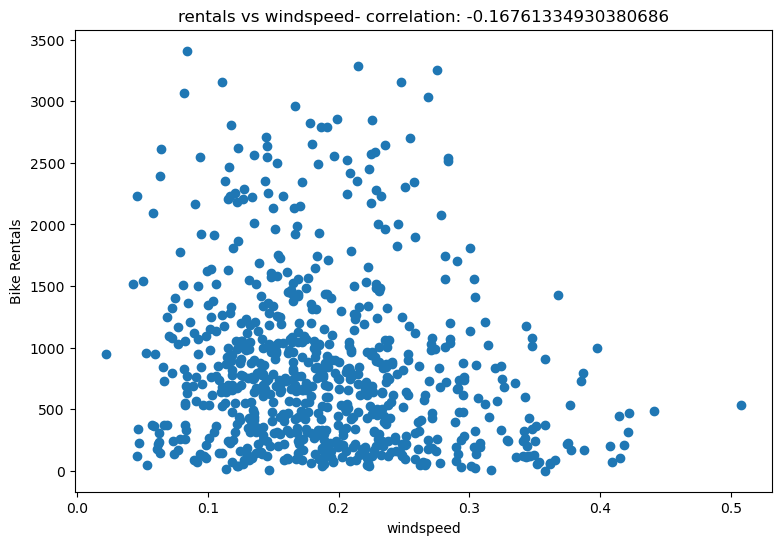

In [9]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
#     ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    plt.title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

The results aren't conclusive, but if you look closely at the scatter plots for temp and atemp, you can see a vague diagonal trend showing that higher rental counts tend to coincide with higher temperatures; and a correlation value of just over 0.5 for both of these features supports this observation. [Sonuçlar kesin değil, ancak sıcaklık ve sıcaklık için dağılım grafiklerine yakından bakarsanız, daha yüksek kira sayılarının daha yüksek sıcaklıklarla örtüşme eğiliminde olduğunu gösteren belirsiz bir diyagonal eğilim görebilirsiniz; ve bu özelliklerin her ikisi için 0,5'in biraz üzerinde bir korelasyon değeri bu gözlemi desteklemektedir.] Conversely, the plots for hum and windspeed show a slightly negative correlation, indicating that there are fewer rentals on days with high humidity or windspeed. [Tersine, uğultu ve rüzgar hızı çizimleri, yüksek nemli veya rüzgar hızı olan günlerde daha az kiralama olduğunu gösteren hafif negatif bir korelasyon göstermektedir.]

Now let's compare the categorical features to the label. [Şimdi kategorik özellikleri etiketle karşılaştıralım.] We'll do this by creating box plots that show the distribution of rental counts for each category. [Bunu, her kategori için kiralama sayılarının dağılımını gösteren kutu grafikleri oluşturarak yapacağız.]

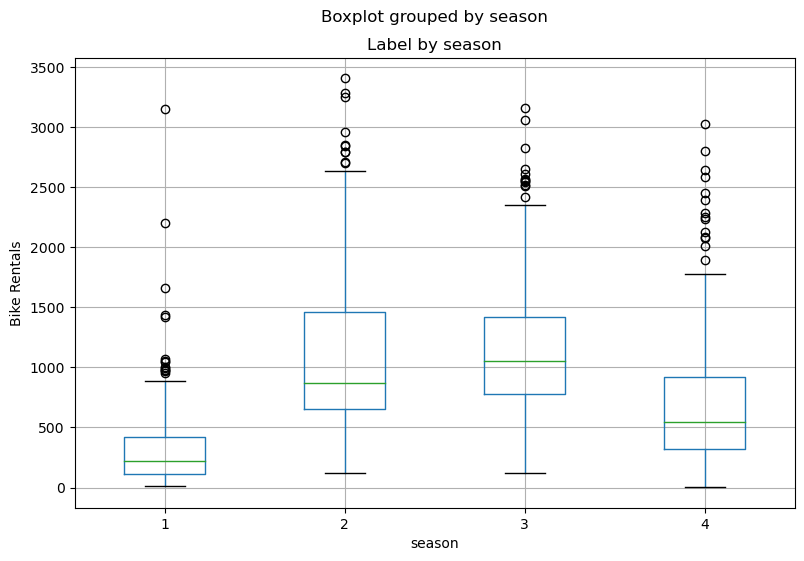

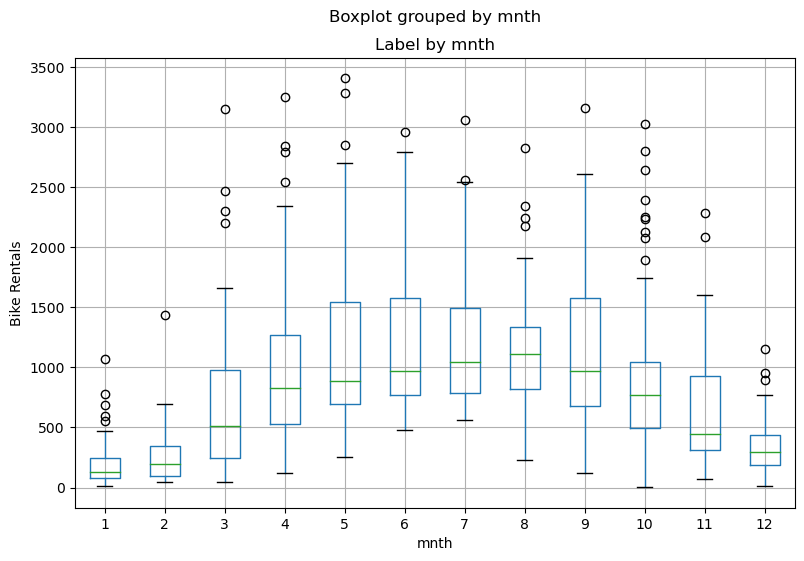

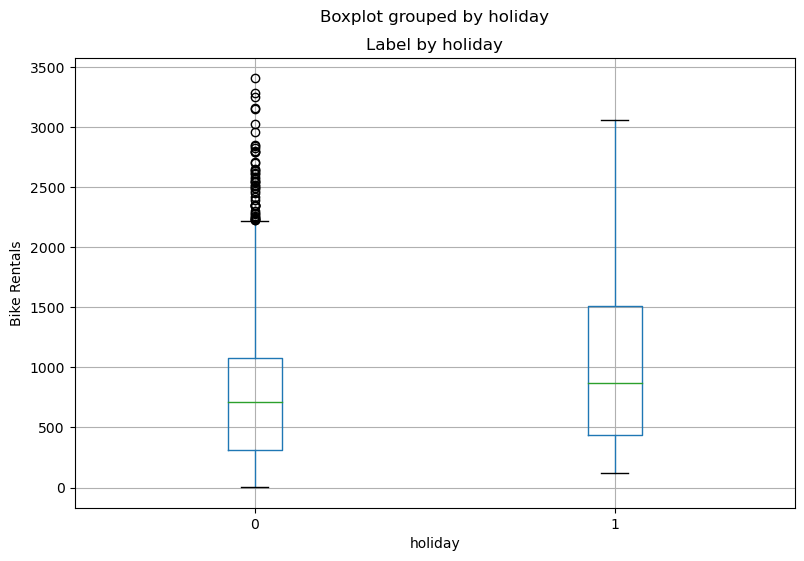

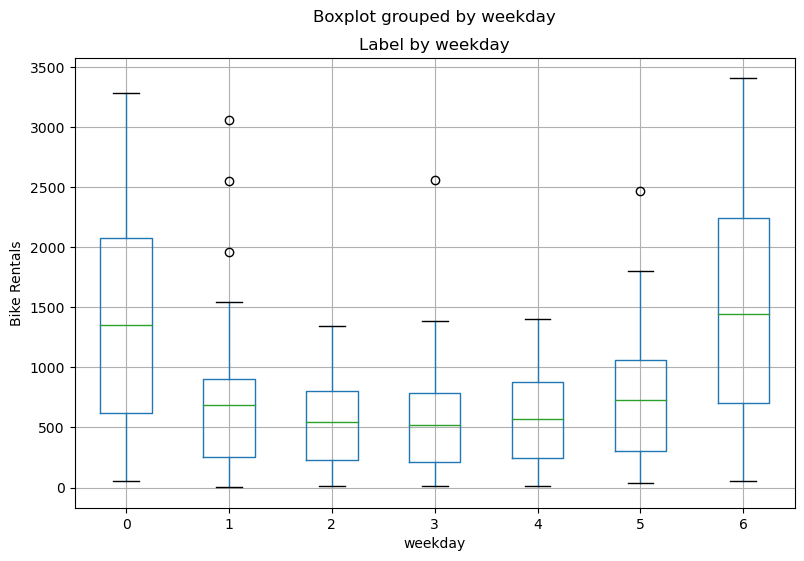

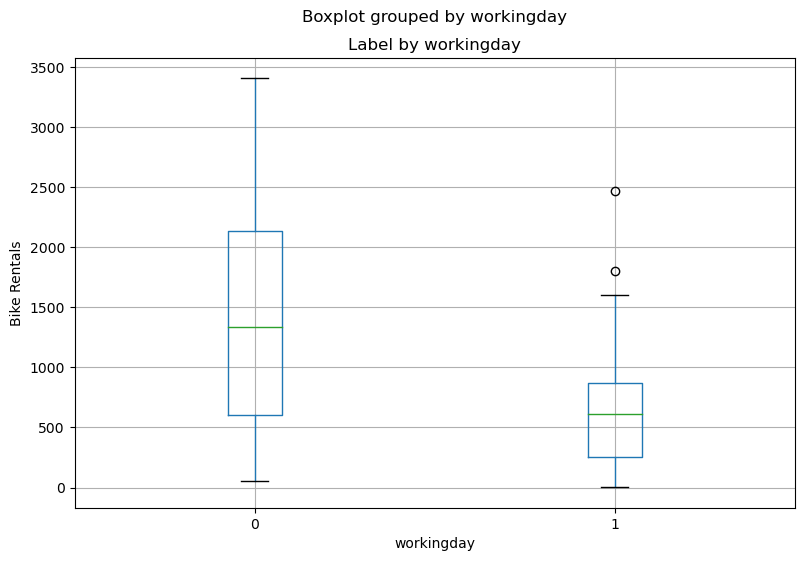

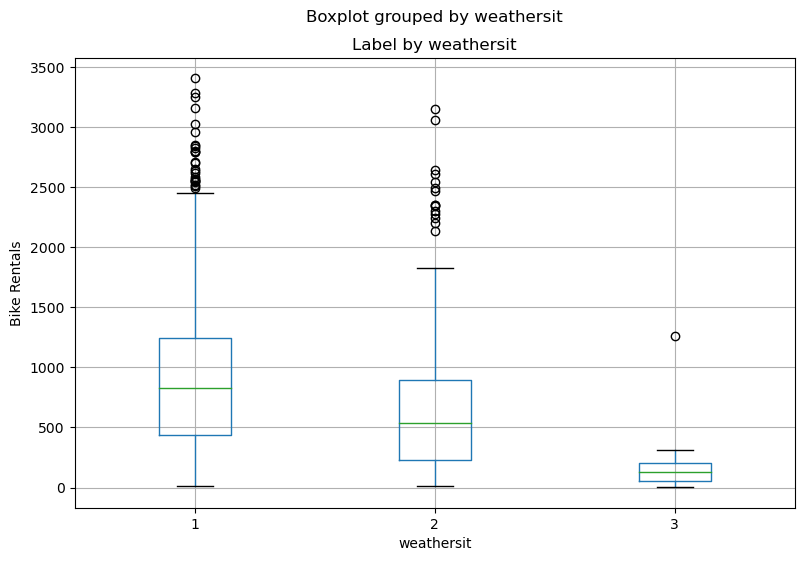

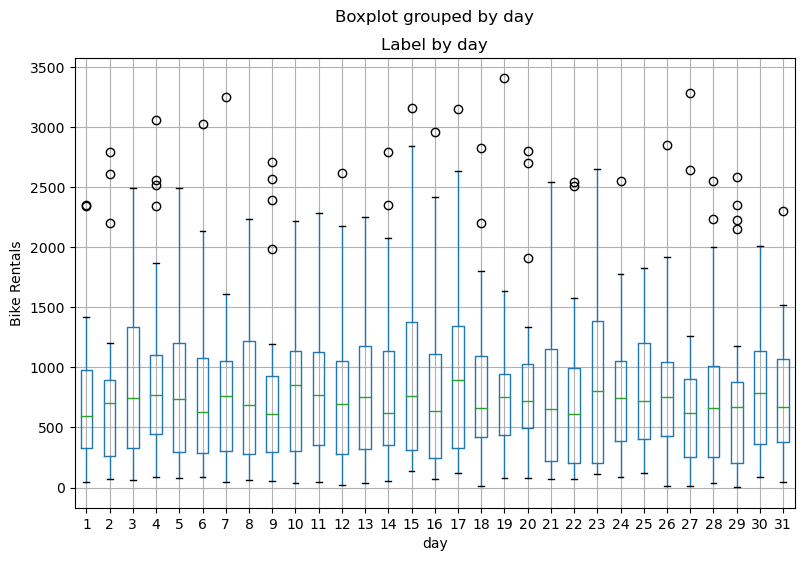

In [10]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

The plots show some variance in the relationship between some category values and rentals. [Grafikler, bazı kategori değerleri ile kiralamalar arasındaki ilişkide bazı farklılıklar göstermektedir.] For example, there's a clear difference in the distribution of rentals on weekends (weekday 0 or 6) and those during the working week (weekday 1 to 5). [Örneğin, hafta sonları (hafta içi 0 veya 6) ve çalışma haftasındaki (hafta içi 1 ila 5) kiraların dağılımında açık bir fark vardır.] Similarly, there are notable differences for holiday and workingday categories. [Benzer şekilde tatil ve iş günü kategorilerinde de dikkate değer farklılıklar vardır.] There's a noticeable trend that shows different rental distributions in summer and fall months compared to spring and winter months. [İlkbahar ve kış aylarına göre yaz ve sonbahar aylarında farklı kira dağılımları gösteren dikkat çekici bir trend var.] The weathersit category also seems to make a difference in rental distribution. [Hava durumu kategorisi de kiralama dağılımında bir fark yaratıyor gibi görünüyor.] The day feature we created for the day of the month shows little variation, indicating that it's probably not predictive of the number of rentals. [Ayın günü için oluşturduğumuz gün özelliği çok az değişiklik gösteriyor ve bu da muhtemelen kiralama sayısını tahmin etmediğini gösteriyor.]

## Train a Regression Model

Now that we've explored the data, it's time to use it to train a regression model that uses the features we've identified as potentially predictive to predict the rentals label. [Şimdi verileri araştırdığımıza göre, kiralama etiketini tahmin etmek için potansiyel olarak tahmine dayalı olarak tanımladığımız özellikleri kullanan bir regresyon modelini eğitmek için kullanma zamanı.] The first thing we need to do is to separate the features we want to use to train the model from the label we want it to predict. [Yapmamız gereken ilk şey, modeli eğitmek için kullanmak istediğimiz özellikleri tahmin etmesini istediğimiz etiketten ayırmaktır.]

In [11]:
# Separate features and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

After separating the dataset, we now have numpy arrays named X containing the features, and y containing the labels. [Veri kümesini ayırdıktan sonra, artık özellikleri içeren X ve etiketleri içeren y adlı numpy dizilerimiz var.]

We could train a model using all of the data; but it's common practice in supervised learning to split the data into two subsets; a (typically larger) set with which to train the model, and a smaller "hold-back" set with which to validate the trained model. [Tüm verileri kullanarak bir model eğitebiliriz; ancak verileri iki alt kümeye bölmek denetimli öğrenmede yaygın bir uygulamadır; modeli eğitmek için (tipik olarak daha büyük) bir set ve eğitilmiş modeli doğrulamak için daha küçük bir 'bekleme' seti.] This enables us to evaluate how well the model performs when used with the validation dataset by comparing the predicted labels to the known labels. [Bu, tahmin edilen etiketleri bilinen etiketlerle karşılaştırarak doğrulama veri seti ile kullanıldığında modelin ne kadar iyi performans gösterdiğini değerlendirmemizi sağlar.] It's important to split the data randomly (rather than say, taking the first 70% of the data for training and keeping the rest for validation). [Verileri rastgele bölmek önemlidir (verilerin ilk %70'ini eğitim için almak ve gerisini doğrulama için tutmak yerine).] This helps ensure that the two subsets of data are statistically comparable (so we validate the model with data that has a similar statistical distribution to the data on which it was trained). [Bu, iki veri alt kümesinin istatistiksel olarak karşılaştırılabilir olmasını sağlamaya yardımcı olur (böylece modeli, üzerinde eğitildiği verilere benzer bir istatistiksel dağılıma sahip verilerle doğrularız).]

To randomly split the data, we'll use the train_test_split function in the scikit-learn library. [Verileri rastgele bölmek için scikit-learn kitaplığındaki train_test_split işlevini kullanacağız.] This library is one of the most widely used machine learning packages for Python. [Bu kitaplık, Python için en yaygın kullanılan makine öğrenimi paketlerinden biridir.]

In [12]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


Now we have the following four datasets:

- **X_train**: The feature values we'll use to train the model

- **y_train**: The corresponding labels we'll use to train the model

- **X_test**: The feature values we'll use to validate the model

- **y_test**: The corresponding labels we'll use to validate the model

Now we're ready to train a model by fitting a suitable regression algorithm to the training data. [Artık eğitim verilerine uygun bir regresyon algoritması uydurarak bir modeli eğitmeye hazırız.] We'll use a linear regression algorithm, a common starting point for regression that works by trying to find a linear relationship between the X values and the y label. [X değerleri ve y etiketi arasında doğrusal bir ilişki bulmaya çalışarak çalışan, regresyon için ortak bir başlangıç noktası olan bir doğrusal regresyon algoritması kullanacağız.] The resulting model is a function that conceptually defines a line where every possible X and y value combination intersect. [Ortaya çıkan model, olası her X ve y değeri kombinasyonunun kesiştiği bir çizgiyi kavramsal olarak tanımlayan bir fonksiyondur.]

In Scikit-Learn, training algorithms are encapsulated in estimators, and in this case we'll use the LinearRegression estimator to train a linear regression model. [Scikit-Learn'de, eğitim algoritmaları tahmin edicilerde kapsüllenir ve bu durumda bir lineer regresyon modelini eğitmek için LinearRegression tahmin edicisini kullanacağız.]

In [13]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


**Evaluate the Trained Model**

Now that we've trained the model, we can use it to predict rental counts for the features we held back in our validation dataset. [Artık modeli eğittiğimize göre, doğrulama veri kümemizde tuttuğumuz özellikler için kiralama sayılarını tahmin etmek için kullanabiliriz.] Then we can compare these predictions to the actual label values to evaluate how well (or not!) [Ardından, bu tahminleri gerçek etiket değerleriyle karşılaştırarak ne kadar iyi (ya da değil!)] the model is working. [model çalışıyor.]

In [14]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


Comparing each prediction with its corresponding "ground truth" actual value isn't a very efficient way to determine how well the model is predicting. [Her bir tahmini, karşılık gelen 'temel gerçek' gerçek değeriyle karşılaştırmak, modelin ne kadar iyi tahmin ettiğini belirlemenin çok etkili bir yolu değildir.] Let's see if we can get a better indication by visualizing a scatter plot that compares the predictions to the actual labels. [Tahminleri gerçek etiketlerle karşılaştıran bir dağılım grafiğini görselleştirerek daha iyi bir gösterge elde edip edemeyeceğimizi görelim.] We'll also overlay a trend line to get a general sense for how well the predicted labels align with the true labels. [Ayrıca, tahmin edilen etiketlerin gerçek etiketlerle ne kadar iyi hizalandığına dair genel bir fikir edinmek için bir eğilim çizgisi yerleştireceğiz.]

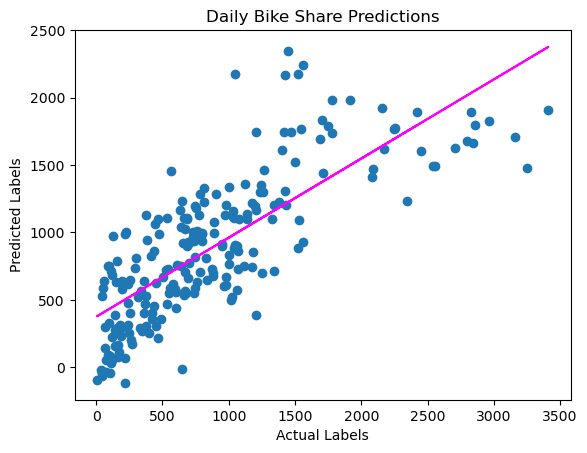

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line; but there's a fair amount of difference between the ideal function represented by the line and the results. [Kesin bir diyagonal trend vardır ve tahmin edilen ve gerçek değerlerin kesişimleri genellikle trend çizgisinin yolunu takip eder; ancak çizgi ile temsil edilen ideal fonksiyon ile sonuçlar arasında oldukça fazla fark var.] This variance represents the residuals of the model - in other words, the difference between the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label. [Bu varyans, modelin artıklarını temsil eder - başka bir deyişle, model eğitim sırasında öğrendiği katsayıları doğrulama verilerine uyguladığında tahmin edilen etiket ile doğrulama etiketinin gerçek değeri arasındaki farktır.] These residuals when evaluated from the validation data indicate the expected level of error when the model is used with new data for which the label is unknown. [Doğrulama verilerinden değerlendirildiğinde bu artıklar, model, etiketi bilinmeyen yeni verilerle kullanıldığında beklenen hata seviyesini gösterir.]

You can quantify the residuals by calculating a number of commonly used evaluation metrics. [Yaygın olarak kullanılan bir dizi değerlendirme metriğini hesaplayarak artıkları nicelleştirebilirsiniz.] We'll focus on the following three: [Aşağıdaki üçüne odaklanacağız:]

- **Mean Square Error (MSE)**: The mean of the squared differences between predicted and actual values. [Ortalama Kare Hatası (MSE): Tahmini ve gerçek değerler arasındaki kare farklarının ortalaması.] This yields a relative metric in which the smaller the value, the better the fit of the model [Bu, değer ne kadar küçükse modelin uyumu o kadar iyi olan göreli bir metrik verir.]

- **Root Mean Square Error (RMSE)**: The square root of the MSE. [Kök Ortalama Kare Hatası (RMSE): MSE'nin karekökü.] This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). [Bu, etiketle aynı birimde mutlak bir metrik verir (bu durumda, kiralama sayısı).] The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!) [Değer ne kadar küçük olursa, model o kadar iyi olur (basit bir anlamda, tahminlerin yanlış olduğu ortalama kiralama sayısını temsil eder!)]

- **Coefficient of Determination (usually known as R-squared or R2)**: A relative metric in which the higher the value, the better the fit of the model. [Belirleme Katsayısı (genellikle R-kare veya R2 olarak bilinir): Değer ne kadar yüksekse modelin uyumu o kadar iyi olan göreli bir metrik.] In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain. [Özünde, bu metrik, modelin açıklayabildiği tahmin edilen ve gerçek etiket değerleri arasındaki varyansın ne kadarını temsil eder.]

**Note**: You can find out more about these and other metrics for evaluating regression models in the Scikit-Learn documentation (https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) [Not: Scikit-Learn belgelerinde regresyon modellerini değerlendirmek için bu ve diğer metrikler hakkında daha fazla bilgi bulabilirsiniz.]

Let's use Scikit-Learn to calculate these metrics for our model, based on the predictions it generated for the validation data. [Doğrulama verileri için oluşturduğu tahminlere dayanarak modelimiz için bu metrikleri hesaplamak için Scikit-Learn'ü kullanalım.]

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035606
RMSE: 449.41357285951665
R2: 0.6040454736919187


So now we've quantified the ability of our model to predict the number of rentals. [Şimdi modelimizin kiralama sayısını tahmin etme yeteneğini ölçtük.] It definitely has some predictive power, but we can probably do better! [Kesinlikle bir tahmin gücü var, ama muhtemelen daha iyisini yapabiliriz!]

**Summary**

Here we've explored our data and fit a basic regression model. [Burada verilerimizi araştırdık ve temel bir regresyon modeline uyduk.] In the next notebook, we will try a number of other regression algorithms to improve performance [Bir sonraki not defterinde, performansı artırmak için bir dizi başka regresyon algoritması deneyeceğiz.]

**Further Reading**

To learn more about Scikit-Learn, see the Scikit-Learn documentation (https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)